# CRUDE DIVORCE RATE
- **The crude divorce rate is the ratio of the number of divorces during the year to the average population in that year. The value is expressed per 1000 persons.**

### vysvětlení pro debílky
- **number of divorces during the year:** Tento údaj zahrnuje celkový počet rozvodů, které se v průběhu jednoho kalendářního roku odehrály. To může zahrnovat rozvody manželství, rozvody registrovaných partnerství atd.
- **average population in that year:** Pro výpočet hrubé rozvodovosti se používá průměrná populace během daného roku. To znamená, že se berou v úvahu všechny osoby v dané populaci, které mohou být potenciálními kandidáty na rozvod.
- **per 1000 persons:** Hrubá rozvodovost se obvykle vyjadřuje jako poměr na 1000 osob, aby byla získána lepší srovnatelnost mezi různými populacemi a časovými obdobími. (*Například, pokud hrubá rozvodovost je 2.5 na 1000 osob, znamená to, že v průměru 2.5 rozvody proběhly za rok na každých 1000 osob v dané populaci.*)


In [387]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import mplcyberpunk

In [388]:
file_divorce = "estat_tps00216.tsv"
divorce_data = pd.read_csv(file_divorce, sep='\t')

# Split the values in the column 'freq,indic_de,geo\TIME_PERIOD'
divorce_data[['freq', 'indic_de', 'geo']] = divorce_data['freq,indic_de,geo\\TIME_PERIOD'].str.split(',', expand=True)
divorce_data = divorce_data.drop('freq,indic_de,geo\\TIME_PERIOD', axis=1)

In [389]:
divorce_data

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,freq,indic_de,geo
0,:,:,:,1.5,1.3,1.9,1.6,1.7,2.1,1.5,1.1,:,A,GDIVRT,AL
1,1.0,:,:,:,1.2,1.2,:,1.3,1.3,1.1,:,:,A,GDIVRT,AM
2,2.1,2.0,1.9,1.9,1.9,1.8,1.8,1.8,1.8,1.7,:,:,A,GDIVRT,AT
3,1.2,1.2,1.2,1.3,1.3,1.3,1.5,1.5,1.7,1.4,:,:,A,GDIVRT,AZ
4,:,0.6,:,:,:,:,:,:,:,:,:,:,A,GDIVRT,BA
5,2.5,2.3,2.2,2.2,2.2,2.1,2.0,2.0,2.0,1.8,1.9,1.7,A,GDIVRT,BE
6,1.4,1.6,1.5,1.5,1.5,1.5,1.5,1.5,1.6,1.3,1.5,1.4,A,GDIVRT,BG
7,4.1,4.1,3.8,3.7,3.5,3.4,3.4,3.5,:,:,:,:,A,GDIVRT,BY
8,2.2 b,2.2,2.1,2.0,2.1,2.0,1.9,1.9,2.0,1.9,2.0,1.8,A,GDIVRT,CH
9,2.3,2.4,2.2,2.2,2.1,2.3,2.2,2.4,2.6,:,:,:,A,GDIVRT,CY


## Data vizualization

In [390]:
def get_data(dataset, geo, start=0, end=11):
    data = dataset
    # selects row from divorce_dataset with corresponding state
    state_record = data[data['geo'] == geo]

    # selects only divorce rate columns
    state_divorce_rates = state_record.iloc[:, start:end]

    # check if divorce_data contain missing values ': ', if true return None
    if (': ' in state_divorce_rates.values):
        #print(f"{geo}: contain missing values")
        return None

    # remove flags
    remove_flag_lambda = lambda value: value.split(' ')[0]
    for column in state_divorce_rates.columns:
        state_divorce_rates.loc[:, column] = state_divorce_rates.loc[:, column].apply(remove_flag_lambda)

    # convert divorce_dataframe to list and convert its values to numeric
    list_divorce_rates = state_divorce_rates.values.ravel().tolist()
    divorce_data_to_plot = []
    [divorce_data_to_plot.append(float(x)) for x in list_divorce_rates]

    return divorce_data_to_plot

    
get_data(divorce_data, 'RS', end=3)


[1.1, 1.0, 1.1]

In [391]:
# select Czech republic divorce_data
divorce_rate_cz = divorce_data[divorce_data['geo'] == 'CZ']
divorce_rate_sk = divorce_data[divorce_data['geo'] == 'SK']
divorce_rate_eu = divorce_data[divorce_data['geo'] == 'EU27_2020']

print(f"CZ:\n{divorce_rate_cz}\n")
print(f"SK:\n{divorce_rate_sk}\n")
print(f"EU:\n{divorce_rate_eu}\n")


CZ:
   2011  2012  2013  2014  2015  2016  2017  2018  2019  2020   2021  2022   \
10  2.7   2.5   2.7   2.5   2.5   2.4   2.4   2.3   2.3   2.0   2.0 b  1.9    

   freq indic_de geo  
10    A   GDIVRT  CZ  

SK:
   2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021  2022   \
45  2.1   2.0   2.0   1.9   1.8   1.7   1.8   1.8   1.7   1.5   1.5   1.5    

   freq indic_de geo  
45    A   GDIVRT  SK  

EU:
   2011  2012  2013  2014  2015  2016   2017   2018   2019   2020   2021   \
18  1.9   1.9   1.8   1.8   1.9   1.9   1.9 e  1.8 e  1.8 e  1.6 e  1.7 e   

    2022  freq indic_de        geo  
18  1.6 e    A   GDIVRT  EU27_2020  



In [392]:
# select only numeric divorce_data
plot_divorce_data_cz = divorce_rate_cz.iloc[:, 0:11]
plot_divorce_data_sk = divorce_rate_sk.iloc[:, 0:11]
plot_divorce_data_eu = divorce_rate_eu.iloc[:, 0:11]

print(f"CZ:\n{plot_divorce_data_cz}\n")
print(f"SK:\n{plot_divorce_data_sk}\n")
print(f"EU:\n{plot_divorce_data_eu}\n")

CZ:
   2011  2012  2013  2014  2015  2016  2017  2018  2019  2020   2021 
10  2.7   2.5   2.7   2.5   2.5   2.4   2.4   2.3   2.3   2.0   2.0 b

SK:
   2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021 
45  2.1   2.0   2.0   1.9   1.8   1.7   1.8   1.8   1.7   1.5   1.5 

EU:
   2011  2012  2013  2014  2015  2016   2017   2018   2019   2020   2021 
18  1.9   1.9   1.8   1.8   1.9   1.9   1.9 e  1.8 e  1.8 e  1.6 e  1.7 e



## Dataset structure

### Special values:
- **(:)**   not available

### Available flags:
- **(b)**   break in time series
- **(p)**   provisional
- **(bp)**  break in time series, provisional
- **(e)**   estimated
- **(ep)**  estimated, provisional


In [393]:
# clean divorce_dataframe by removing flags
def remove_flag(value):
    return value.split(' ')[0]

for column in plot_divorce_data_cz.columns:
    plot_divorce_data_cz.loc[:, column] = plot_divorce_data_cz.loc[:, column].apply(remove_flag)
    plot_divorce_data_sk.loc[:, column] = plot_divorce_data_sk.loc[:, column].apply(remove_flag)
    plot_divorce_data_eu.loc[:, column] = plot_divorce_data_eu.loc[:, column].apply(remove_flag)

In [394]:
print(f"CZ:\n{plot_divorce_data_cz}\n")
print(f"SK:\n{plot_divorce_data_sk}\n")
print(f"EU:\n{plot_divorce_data_eu}\n")

CZ:
   2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021 
10   2.7   2.5   2.7   2.5   2.5   2.4   2.4   2.3   2.3   2.0   2.0

SK:
   2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021 
45   2.1   2.0   2.0   1.9   1.8   1.7   1.8   1.8   1.7   1.5   1.5

EU:
   2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  2021 
18   1.9   1.9   1.8   1.8   1.9   1.9   1.9   1.8   1.8   1.6   1.7



In [395]:
divorce_data

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,freq,indic_de,geo
0,:,:,:,1.5,1.3,1.9,1.6,1.7,2.1,1.5,1.1,:,A,GDIVRT,AL
1,1.0,:,:,:,1.2,1.2,:,1.3,1.3,1.1,:,:,A,GDIVRT,AM
2,2.1,2.0,1.9,1.9,1.9,1.8,1.8,1.8,1.8,1.7,:,:,A,GDIVRT,AT
3,1.2,1.2,1.2,1.3,1.3,1.3,1.5,1.5,1.7,1.4,:,:,A,GDIVRT,AZ
4,:,0.6,:,:,:,:,:,:,:,:,:,:,A,GDIVRT,BA
5,2.5,2.3,2.2,2.2,2.2,2.1,2.0,2.0,2.0,1.8,1.9,1.7,A,GDIVRT,BE
6,1.4,1.6,1.5,1.5,1.5,1.5,1.5,1.5,1.6,1.3,1.5,1.4,A,GDIVRT,BG
7,4.1,4.1,3.8,3.7,3.5,3.4,3.4,3.5,:,:,:,:,A,GDIVRT,BY
8,2.2 b,2.2,2.1,2.0,2.1,2.0,1.9,1.9,2.0,1.9,2.0,1.8,A,GDIVRT,CH
9,2.3,2.4,2.2,2.2,2.1,2.3,2.2,2.4,2.6,:,:,:,A,GDIVRT,CY


## Creating plot

In [396]:
# Axes divorce_data
x_axis_raw = plot_divorce_data_cz.columns.tolist()
y_axis_raw_cz = plot_divorce_data_cz.values.ravel().tolist()
y_axis_raw_sk = plot_divorce_data_sk.values.ravel().tolist()
y_axis_raw_eu = plot_divorce_data_eu.values.ravel().tolist()

x_axis = []
y_axis_cz = []
y_axis_sk = []
y_axis_eu = []

# removes space on last position of column names: '2011 ' ––> '2011'
for i in range(len(x_axis_raw)):
    x_axis.append(x_axis_raw[i][:-1])

# convert y_axis elements to float
[y_axis_cz.append(float(x)) for x in y_axis_raw_cz]
[y_axis_sk.append(float(x)) for x in y_axis_raw_sk]
[y_axis_eu.append(float(x)) for x in y_axis_raw_eu]


print(f"X axis type: {type(x_axis)}\nX axis values: {x_axis}\n\nY axis type: {type(np.array(y_axis_cz))}\nY axis values: {y_axis_cz}")

X axis type: <class 'list'>
X axis values: ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

Y axis type: <class 'numpy.ndarray'>
Y axis values: [2.7, 2.5, 2.7, 2.5, 2.5, 2.4, 2.4, 2.3, 2.3, 2.0, 2.0]


In [397]:
plot_divorce_data_cz.columns

Index(['2011 ', '2012 ', '2013 ', '2014 ', '2015 ', '2016 ', '2017 ', '2018 ',
       '2019 ', '2020 ', '2021 '],
      dtype='object')

### Line plot

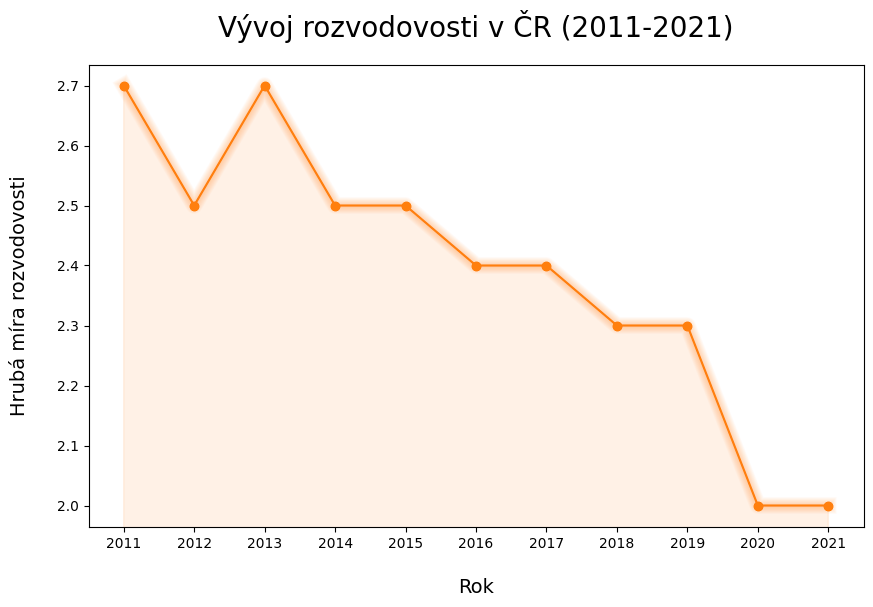

In [398]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.style.use("cyberpunk")

ax.plot(x_axis,
        y_axis_cz,
        marker='o',
        color='C1')
ax.set_title("Vývoj rozvodovosti v ČR (2011-2021)", fontsize=20, pad=20)
ax.set_xlabel("Rok", fontsize=14, labelpad=20)
ax.set_ylabel("Hrubá míra rozvodovosti", fontsize=14, labelpad=20)

mplcyberpunk.make_lines_glow()
mplcyberpunk.add_underglow()

plt.show()

<Figure size 640x480 with 0 Axes>

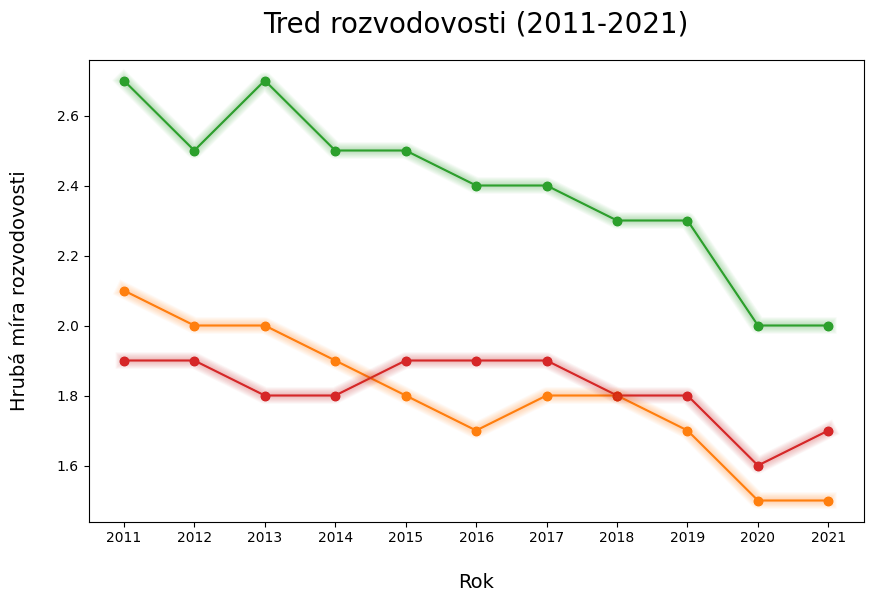

In [399]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_axis,
        y_axis_cz,
        marker='o',
        color='C2')

ax.plot(x_axis,
        y_axis_sk,
        marker='o',
        color='C1')

ax.plot(x_axis,
        y_axis_eu,
        marker='o',
        color='C3')

ax.set_title("Tred rozvodovosti (2011-2021)", fontsize=20, pad=20)
ax.set_xlabel("Rok", fontsize=14, labelpad=20)
ax.set_ylabel("Hrubá míra rozvodovosti", fontsize=14, labelpad=20)

mplcyberpunk.make_lines_glow()


plt.show()

### Bar plot

<Figure size 640x480 with 0 Axes>

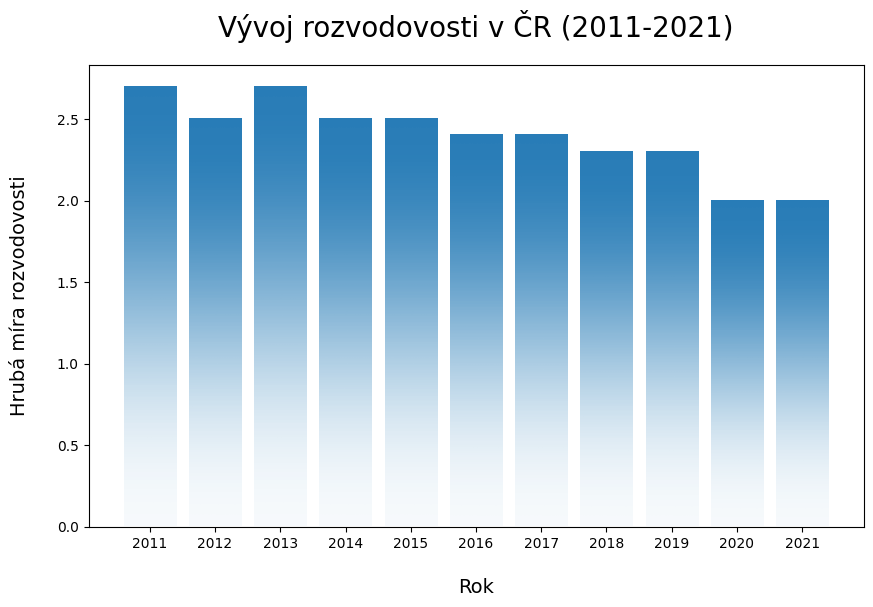

In [400]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 6))

bar = ax.bar(x_axis, y_axis_cz, color="C0")
ax.set_title("Vývoj rozvodovosti v ČR (2011-2021)", fontsize=20, pad=20)
ax.set_xlabel("Rok", fontsize=14, labelpad=20)
ax.set_ylabel("Hrubá míra rozvodovosti", fontsize=14, labelpad=20)

mplcyberpunk.add_bar_gradient(bars=bar)

plt.show()

# Graphs by marv31

In [401]:
# divorce divorce_data
plot_divorce_data_cz = get_data(divorce_data, 'CZ')
plot_divorce_data_eu = get_data(divorce_data, 'EU27_2020')
plot_divorce_data_lv = get_data(divorce_data, 'LV')
plot_divorce_data_mk = get_data(divorce_data, 'MK')


<Figure size 640x480 with 0 Axes>

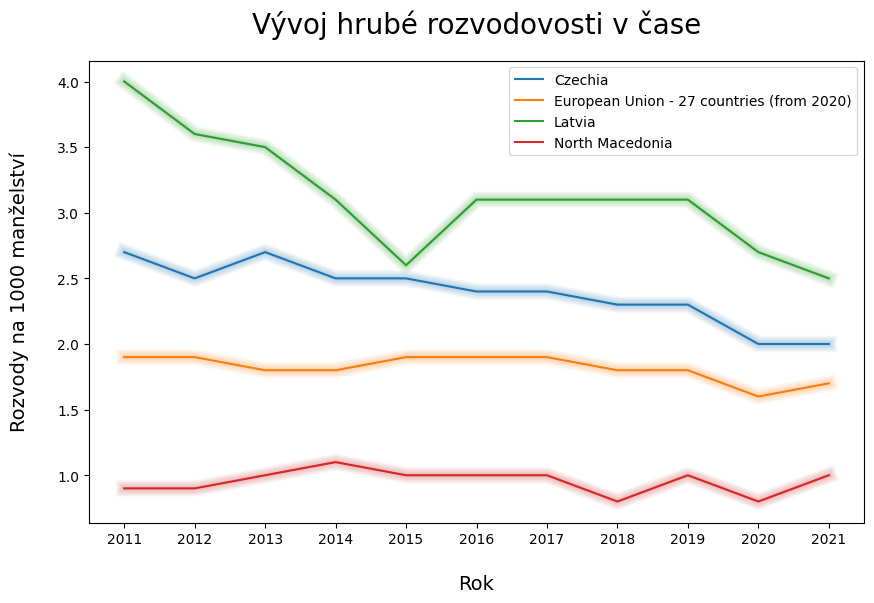

In [402]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(x_axis, plot_divorce_data_cz, color='C0', label="Czechia")
ax.plot(x_axis, plot_divorce_data_eu, color='C1', label="European Union - 27 countries (from 2020)")
ax.plot(x_axis, plot_divorce_data_lv, color='C2', label="Latvia")
ax.plot(x_axis, plot_divorce_data_mk, color='C3', label="North Macedonia")

ax.set_title("Vývoj hrubé rozvodovosti v čase", fontsize=20, pad=20)
ax.set_xlabel("Rok", fontsize=14, labelpad=20)
ax.set_ylabel("Rozvody na 1000 manželství", fontsize=14, labelpad=20)

#mplcyberpunk.add_glow_effects()
mplcyberpunk.make_lines_glow()

plt.legend(["Czechia", "European Union - 27 countries (from 2020)", "Latvia", "North Macedonia"])
plt.show()

In [403]:
divorce_data

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,freq,indic_de,geo
0,:,:,:,1.5,1.3,1.9,1.6,1.7,2.1,1.5,1.1,:,A,GDIVRT,AL
1,1.0,:,:,:,1.2,1.2,:,1.3,1.3,1.1,:,:,A,GDIVRT,AM
2,2.1,2.0,1.9,1.9,1.9,1.8,1.8,1.8,1.8,1.7,:,:,A,GDIVRT,AT
3,1.2,1.2,1.2,1.3,1.3,1.3,1.5,1.5,1.7,1.4,:,:,A,GDIVRT,AZ
4,:,0.6,:,:,:,:,:,:,:,:,:,:,A,GDIVRT,BA
5,2.5,2.3,2.2,2.2,2.2,2.1,2.0,2.0,2.0,1.8,1.9,1.7,A,GDIVRT,BE
6,1.4,1.6,1.5,1.5,1.5,1.5,1.5,1.5,1.6,1.3,1.5,1.4,A,GDIVRT,BG
7,4.1,4.1,3.8,3.7,3.5,3.4,3.4,3.5,:,:,:,:,A,GDIVRT,BY
8,2.2 b,2.2,2.1,2.0,2.1,2.0,1.9,1.9,2.0,1.9,2.0,1.8,A,GDIVRT,CH
9,2.3,2.4,2.2,2.2,2.1,2.3,2.2,2.4,2.6,:,:,:,A,GDIVRT,CY


In [404]:
divorce_data_2011_raw = [get_data(divorce_data, 'ES', end=1), get_data(divorce_data, 'RU', end=1), get_data(divorce_data, 'DE', end=1), get_data(divorce_data, 'SE', end=1), get_data(divorce_data, 'FR', end=1), get_data(divorce_data, 'IT', end=1), get_data(divorce_data, 'PL', end=1), get_data(divorce_data, 'RO', end=1), get_data(divorce_data, 'IE', end=1), get_data(divorce_data, 'RS', end=1)]
divorce_data_2011 = [item for sublist in divorce_data_2011_raw for item in sublist]

states_2011 = ['Spain', 'Russia', 'Germany', 'Sweden', 'France', 'Italy', 'Poland', 'Romania', 'Ireland', 'Serbia']
divorce_data_2011

[2.2, 4.7, 2.3, 2.5, 2.0, 0.9, 1.7, 1.8, 0.6, 1.1]

<Figure size 640x480 with 0 Axes>

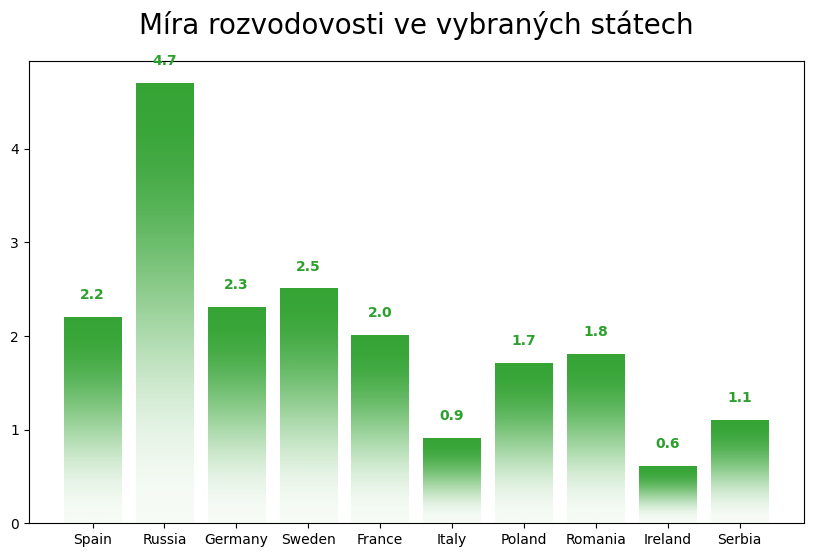

In [405]:
plt.clf()

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(states_2011, divorce_data_2011, color='C2')

ax.set_title("Míra rozvodovosti ve vybraných státech", fontsize=20, pad=20)

for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.2,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color=bar.get_facecolor(),
      weight='bold'
  )

mplcyberpunk.add_bar_gradient(bars=bars)
plt.show()

# CRUDE MARRIAGE RATE
- **The crude marriage rate is the ratio of the number of marriages during the year to the average population in that year. The value is expressed per 1000 persons.**

### vysvětlení pro debílky
- **number of marriages during the year:** Absolutní počet manželských svazků, které byly uzavřeny v průběhu jednoho kalendářního roku. Tento údaj nám poskytuje informaci o tom, kolik nových manželství bylo v daném období uzavřeno.
- **average population in that year:** Tento údaj označuje průměrný počet lidí v populaci v průběhu jednoho kalendářního roku. Je důležitý, protože nám umožňuje vypočítat poměr mezi počtem sňatků a celkovou velikostí populace, což nám poskytuje relativní míru manželské aktivity.
- **per 1000 persons:** Tento poslední údaj indikuje způsob vyjádření brutální manželské míry. Místo toho, aby se výsledek vypočítal jako poměr nebo procento, je výsledek vyjádřen jako počet sňatků na 1000 osob v populaci. Tato jednotka umožňuje snadnější srovnání mezi různými populacemi nebo časovými obdobími. (*Pokud máte brutální manželskou míru 8.2, znamená to, že v průběhu jednoho roku bylo uzavřeno průměrně 8.2 manželství na každých 1000 osob v populaci.*)

In [406]:
file_marriage = "estat_tps00206.tsv"
marriage_dataset = pd.read_csv(file_marriage, sep='\t')

marriage_dataset[['freq', 'indic_de', 'geo']] = marriage_dataset['freq,indic_de,geo\\TIME_PERIOD'].str.split(',', expand=True)
marriage_dataset = marriage_dataset.drop('freq,indic_de,geo\\TIME_PERIOD', axis=1)

In [407]:
marriage_dataset

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,freq,indic_de,geo
0,:,3.7,:,:,:,:,:,3.9,:,:,:,:,A,GNUPRT,AD
1,:,:,8.2,8.2,8.7,7.8,7.9,8.1,7.9,6.2,7.0,6.8,A,GNUPRT,AL
2,6.0,:,:,:,5.9,5.4,5.1,5.0,5.3,:,:,:,A,GNUPRT,AM
3,4.3,4.6,4.3,4.4,5.1,5.1,5.1,5.3,5.2,4.4,:,:,A,GNUPRT,AT
4,9.6,8.5,9.2,8.9,7.1,6.8,6.4,6.3,6.4,:,:,:,A,GNUPRT,AZ
5,:,4.8,:,:,:,:,:,:,:,:,:,:,A,GNUPRT,BA
6,3.7 b,3.8,3.4,3.6,4.0,3.9,3.9,3.9,3.9,2.8,3.5,4.2,A,GNUPRT,BE
7,2.9,2.9,3.0,3.4,3.9,3.8,4.0,4.1,4.2,3.2,3.9,3.9,A,GNUPRT,BG
8,9.2,8.1,9.2,8.9,8.6,6.8,7.0,6.4,:,:,:,:,A,GNUPRT,BY
9,5.3 b,5.3,4.9,5.1,5.0,5.0,4.8,4.8,4.5,4.1,4.2,4.7,A,GNUPRT,CH


## Graf marriage and divorce v ČR 2011-2022

In [408]:
marriage_rate_cz = get_data(marriage_dataset, 'CZ')
divorce_rate_cz = get_data(divorce_data, 'CZ')

print(f"Marriages CZ (2011-2022): {marriage_rate_cz}\n\nDivorces CZ (2011-2022): {divorce_rate_cz}")

Marriages CZ (2011-2022): [4.3, 4.3, 4.1, 4.3, 4.6, 4.8, 5.0, 5.1, 5.1, 4.2, 4.5]

Divorces CZ (2011-2022): [2.7, 2.5, 2.7, 2.5, 2.5, 2.4, 2.4, 2.3, 2.3, 2.0, 2.0]


<Figure size 640x480 with 0 Axes>

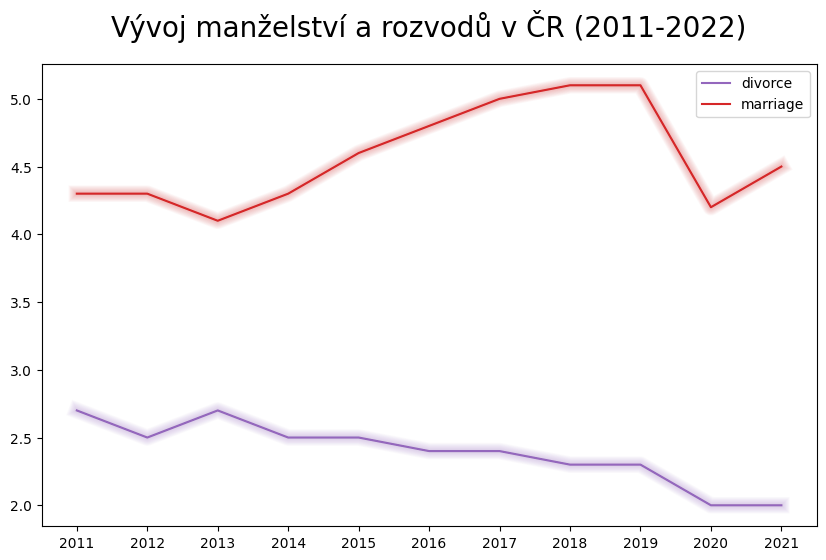

In [409]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x_axis, divorce_rate_cz, color='C4', label="divorce")
ax.plot(x_axis, marriage_rate_cz, color='C3', label="marriage")
ax.plot()

ax.set_title("Vývoj manželství a rozvodů v ČR (2011-2022)", fontsize=20, pad=20)

plt.legend(["divorce", "marriage"])

mplcyberpunk.make_lines_glow()
plt.show()

# Seminárka - main


### Úvod
Semestrální práce zkoumá vývoj rozvodovost na území Evropské unie v letech 2011 až 2022. 

### Data
Data se kterými pracujeme jsou ze statistického úřadu Evroského úřadu. Konkrétně se jedná o dataset obsahující data o hrubé míře rozvodovosti 48 

In [410]:
len(divorce_data[divorce_data['geo'].str.len() == 2])
divorce_data[divorce_data['geo'].str.len() == 2]

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,freq,indic_de,geo
0,:,:,:,1.5,1.3,1.9,1.6,1.7,2.1,1.5,1.1,:,A,GDIVRT,AL
1,1.0,:,:,:,1.2,1.2,:,1.3,1.3,1.1,:,:,A,GDIVRT,AM
2,2.1,2.0,1.9,1.9,1.9,1.8,1.8,1.8,1.8,1.7,:,:,A,GDIVRT,AT
3,1.2,1.2,1.2,1.3,1.3,1.3,1.5,1.5,1.7,1.4,:,:,A,GDIVRT,AZ
4,:,0.6,:,:,:,:,:,:,:,:,:,:,A,GDIVRT,BA
5,2.5,2.3,2.2,2.2,2.2,2.1,2.0,2.0,2.0,1.8,1.9,1.7,A,GDIVRT,BE
6,1.4,1.6,1.5,1.5,1.5,1.5,1.5,1.5,1.6,1.3,1.5,1.4,A,GDIVRT,BG
7,4.1,4.1,3.8,3.7,3.5,3.4,3.4,3.5,:,:,:,:,A,GDIVRT,BY
8,2.2 b,2.2,2.1,2.0,2.1,2.0,1.9,1.9,2.0,1.9,2.0,1.8,A,GDIVRT,CH
9,2.3,2.4,2.2,2.2,2.1,2.3,2.2,2.4,2.6,:,:,:,A,GDIVRT,CY


In [411]:
print(len(divorce_data['geo'].values))
divorce_data['geo'].values

51


array(['AL', 'AM', 'AT', 'AZ', 'BA', 'BE', 'BG', 'BY', 'CH', 'CY', 'CZ',
       'DE', 'DK', 'EA19', 'EA20', 'EE', 'EL', 'ES', 'EU27_2020', 'FI',
       'FR', 'FX', 'GE', 'HR', 'HU', 'IE', 'IS', 'IT', 'LI', 'LT', 'LU',
       'LV', 'MD', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS',
       'RU', 'SE', 'SI', 'SK', 'SM', 'TR', 'UA', 'UK', 'XK'], dtype=object)

## Geo
**AL:** Albania\
**AM:** Armenia\
**AT:** Austria\
**AZ:** Azerbaijan\
**BA:** Bosnia and Herzegovina\
**BE:** Belgia\
**BG:** Bulgaria\
**BY:** Belarus\
**CH:** Switzerland\
**CY:** Cyprus\
**CZ:** Czechia\
**DE:** Germany\
**DK:** Denmark\
**EE:** Estonia\
**EL:** Greece\
**ES:** Spain\
**FI:** Finland\
**FR:** France\
**FX:** Metropolitan France\
**GE:** Georgia\
**HR:** Croatia\
**HU:** Hungary\
**IE:** Ireland\
**IS:** Iceland\
**IT:** Italy\
**LI:** Liechtenstein\
**LT:** Lithuania\
**LU:** Luxemburg\
**LV:** Latvia\
**MD:** Moldova\
**ME:** Montenegro\
**MK:** North Macedonia\
**MT:** Malta\
**NL:** Netherlands\
**NO:** Norway\
**PL:** Poland\
**PT:** Portugal\
**RO:** Romania\
**RS:** Serbia\
**RU:** Russia\
**SE:** Sweden\
**SI:** Slovenia\
**SK:** Slovakia\
**SM:** San Marino\
**TR:** Türkiye\
**UA:** Ukraine\
**UK:** United Kingdom\
**XK:** Kosovo\
[48]

In [412]:
# EU states and their geo code
eu_states = {
    'AT': 'Rakousko',
    'BE': 'Belgie',
    'BG': 'Bulharsko',
    'HR': 'Chorvatsko',
    'CY': 'Kypr',
    'CZ': 'Česko',
    'DK': 'Dánsko',
    'EE': 'Estónsko',
    'FI': 'Finsko',
    'FR': 'Francie',
    'DE': 'Německo',
    'EL': 'Řecko',
    'HU': 'Maďarsko',
    'IE': 'Irsko',
    'IT': 'Itálie',
    'LV': 'Lotyšsko',
    'LT': 'Litva',
    'LU': 'Lucembursko',
    'MT': 'Malta',
    'NL': 'Nizozemsko',
    'PL': 'Polsko',
    'PT': 'Portugalsko',
    'RO': 'Rumunsko',
    'SK': 'Slovensko',
    'SI': 'Slovinsko',
    'ES': 'Španělsko',
    'SE': 'Švédsko'
    }

len(eu_states)

27

### CRUDE DIVORCE RATE data pro země Evropské unie

In [413]:
counter = 1
for state, geo_code in eu_states.items():
    state_values = get_data(divorce_data, geo_code)
    if state_values is None:
        print(f"[{counter}] {state}: HAS MISSING VALUES")
        counter +=1
        continue

    print(f"[{counter}] {state}: {state_values}")
    counter += 1

[1] AT: []
[2] BE: []
[3] BG: []
[4] HR: []
[5] CY: []
[6] CZ: []
[7] DK: []
[8] EE: []
[9] FI: []
[10] FR: []
[11] DE: []
[12] EL: []
[13] HU: []
[14] IE: []
[15] IT: []
[16] LV: []
[17] LT: []
[18] LU: []
[19] MT: []
[20] NL: []
[21] PL: []
[22] PT: []
[23] RO: []
[24] SK: []
[25] SI: []
[26] ES: []
[27] SE: []


### CRUDE MARRIAGE RATE data pro země Evropské unie

In [414]:
counter = 1
for state, geo_code in eu_states.items():
    state_values = get_data(marriage_dataset, geo_code)
    if state_values is None:
        print(f"[{counter}] {state}: HAS MISSING VALUES")
        counter +=1
        continue

    print(f"[{counter}] {state}: {state_values}")
    counter += 1

[1] AT: []
[2] BE: []
[3] BG: []
[4] HR: []
[5] CY: []
[6] CZ: []
[7] DK: []
[8] EE: []
[9] FI: []
[10] FR: []
[11] DE: []
[12] EL: []
[13] HU: []
[14] IE: []
[15] IT: []
[16] LV: []
[17] LT: []
[18] LU: []
[19] MT: []
[20] NL: []
[21] PL: []
[22] PT: []
[23] RO: []
[24] SK: []
[25] SI: []
[26] ES: []
[27] SE: []


## Chybějící data:
### **rozvody:**
    - Rakousko
    - Kypr
    - Francie
    - Řecko
    - Isko

### **svatby:**
    - Rakousko
    - Kypr

## Náboženství:
[náboženství v EU](https://www.pewresearch.org/short-reads/2018/12/05/how-do-european-countries-differ-in-religious-commitment/)

vybral bych tak top 4 nejvíc náboženských států a top 4 nejmín náboženských, aby kdyžtak graf nebyl moc přeplácanej

**most náboženský státy (% of adults who are “highly religious”):**
1. Rumunsko &emsp;**55%**
2. Řecko &emsp;**49%**
3. Chorvatsko &emsp;**44%**
4. Polsko &emsp;**40%**

**least náboženský státy (% of adults who are “highly religious”):**
1. Estónsko &emsp;**7%**
2. Dánsko &emsp;**8%**
3. Česko &emsp;**8%**
4. Švédsko &emsp;**10%**


In [415]:
divorce_data[divorce_data['geo'] == 'AT']

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,freq,indic_de,geo
2,2.1,2.0,1.9,1.9,1.9,1.8,1.8,1.8,1.8,1.7,:,:,A,GDIVRT,AT


# Definice pojmů:
Crude marriage rate : the ratio of the number of marriages during the year to the average population in that year. The value is expressed per 1000 inhabitants.\
Crude divorce rate: the ratio of the number of divorces during the year to the average population in that year. The value is expressed per 1000 inhabitants.\
Legal marital status: marital status is the legally defined marital state.\
Mean age at first marriage: the mean age of men and women when they get married for the first time.\
First marriage rates: the ratio of the number of first time marrying person of age x to the average population of age x, separately for men and women.\
Total first marriage rate: it is computed by adding the first marriage rates by age in a given year, separately for men and women.\
Proportion of first marriages: the ratio of the number of first time marriages in the total number of marriages in a given year, by sex.\
Divorces per 100 marriages: the ratio between the number of divorces (independently of the duration) and the number of marriages in a given year.\
Age and duration definition: Most National Statistical Institutes of the EU Member States provide data on the number of first marriages by both dimensions: age and year of birth of the first-time marrying persons. First marriage statistics are compiled and disseminated, based on the data collected, only by age at last birthday (also referred as age completed).
Most National Statistical Institutes of the EU Member States provide data on the number of divorces by both dimensions: duration and year of marriage. Divorces are compiled and disseminated, based on data collected, only by duration of marriage reached during the year.\
Eurostat uses the concept of age completed when calculating marriage indicators.

# Průměry
### **Artimetický průměr:**
![Artimetický průměr](img_arithmetic_mean)


In [416]:
# Arithmetic mean 
def arithmetic_mean(values):
    sum = 0
    for val in values:
        sum += val
    
    return (sum / len(values))


divorce_rate_cz


[2.7, 2.5, 2.7, 2.5, 2.5, 2.4, 2.4, 2.3, 2.3, 2.0, 2.0]

In [417]:
divorce_rate_cz = get_data(divorce_data, 'CZ')
print(f"ČESKO:\n - aritmetický průměr: {arithmetic_mean(divorce_rate_cz)}")

ČESKO:
 - aritmetický průměr: 2.390909090909091


In [418]:
selected_states = ['RO', 'EL', 'HR', 'PL', 'EE', 'DK', 'CZ', 'SE', 'DE', 'BG', 'NL', 'ES']
final_div_data = divorce_data[divorce_data['geo'].isin(selected_states)]
final_div_data

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,freq,indic_de,geo
6,1.4,1.6,1.5,1.5,1.5,1.5,1.5,1.5,1.6,1.3,1.5,1.4,A,GDIVRT,BG
10,2.7,2.5,2.7,2.5,2.5,2.4,2.4,2.3,2.3,2.0,2.0 b,1.9,A,GDIVRT,CZ
11,2.3,2.2,2.1,2.1,2.0,2.0,1.9,1.8,1.8,1.7,1.7,:,A,GDIVRT,DE
12,2.6,2.8,3.4,3.4,2.9,3.0,2.6,2.6,1.8,2.7,2.2,:,A,GDIVRT,DK
15,2.3,2.4,2.5,2.4,2.6,2.5,2.5,2.4,2.1,1.9,1.9,1.9,A,GDIVRT,EE
16,1.1,1.3,1.5,1.3,1.4,1.0,1.8,:,:,:,:,:,A,GDIVRT,EL
17,2.2,2.2,2.0,2.2,2.1,2.1,2.1,2.0,1.9,1.6,1.8,1.7,A,GDIVRT,ES
23,1.3,1.3,1.4,1.4,1.4,1.7,1.5,1.5,1.5,1.3,1.3,1.2,A,GDIVRT,HR
36,2.0,2.1,2.0,2.1,2.0,2.0,1.9,1.8,1.7,1.7,1.5,1.3,A,GDIVRT,NL
38,1.7 b,1.7,1.7,1.7,1.8,1.7,1.7,1.7,1.7,1.4 ep,1.6 ep,1.6,A,GDIVRT,PL


In [419]:
final_marr_data = marriage_dataset[marriage_dataset['geo'].isin(selected_states)]
final_marr_data

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,freq,indic_de,geo
7,2.9,2.9,3.0,3.4,3.9,3.8,4.0,4.1,4.2,3.2,3.9,3.9,A,GNUPRT,BG
11,4.3,4.3,4.1,4.3,4.6,4.8,5.0,5.1,5.1,4.2,4.5 b,5.1,A,GNUPRT,CZ
12,4.6,4.8,4.6,4.8,4.9,5.0,4.9,5.4,5.0,4.5,4.3,4.7,A,GNUPRT,DE
13,4.9,5.1,4.9,5.0,5.1,5.4,5.5,5.6,5.3,4.9,4.7,:,A,GNUPRT,DK
16,4.1,4.5,4.3,4.7,5.2,4.8,4.9,5.0,5.1,4.6,4.8,5.3,A,GNUPRT,EE
17,5.0,4.5,4.7,4.9,5.0,4.6,4.7,4.4,4.4,2.9,3.9,4.2,A,GNUPRT,EL
18,3.4,3.5,3.3,3.4,3.6,3.7,3.7,3.5,3.5,1.9,3.1,3.7,A,GNUPRT,ES
24,4.7,4.8,4.5,4.6,4.7,4.9,4.9,4.9,4.9,3.8,4.6,4.7,A,GNUPRT,HR
37,4.3,4.2,3.8,3.9,3.8,3.8,3.8,3.7,3.7,2.9,3.2,4.0,A,GNUPRT,NL
39,5.4,5.4,4.7,5.0,5.0,5.1,5.1,5.1,4.8,3.8 ep,4.5 ep,4.2,A,GNUPRT,PL


In [420]:
# replace GEO code with actual state name
for code in final_div_data['geo']:
    # find state name
    name = eu_states.get(code)
    # replace value
    final_div_data.loc[final_div_data['geo'] == code, 'geo'] = name

for code in final_marr_data['geo']:
    # find state name
    name = eu_states.get(code)
    # replace value
    final_marr_data.loc[final_marr_data['geo'] == code, 'geo'] = name


In [421]:
# set GEO column as index
final_div_data.set_index('geo', inplace=True)
final_marr_data.set_index('geo', inplace=True)

In [422]:
final_div_data

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,freq,indic_de
geo,,,,,,,,,,,,,,
Bulharsko,1.4,1.6,1.5,1.5,1.5,1.5,1.5,1.5,1.6,1.3,1.5,1.4,A,GDIVRT
Česko,2.7,2.5,2.7,2.5,2.5,2.4,2.4,2.3,2.3,2.0,2.0 b,1.9,A,GDIVRT
Německo,2.3,2.2,2.1,2.1,2.0,2.0,1.9,1.8,1.8,1.7,1.7,:,A,GDIVRT
Dánsko,2.6,2.8,3.4,3.4,2.9,3.0,2.6,2.6,1.8,2.7,2.2,:,A,GDIVRT
Estónsko,2.3,2.4,2.5,2.4,2.6,2.5,2.5,2.4,2.1,1.9,1.9,1.9,A,GDIVRT
Řecko,1.1,1.3,1.5,1.3,1.4,1.0,1.8,:,:,:,:,:,A,GDIVRT
Španělsko,2.2,2.2,2.0,2.2,2.1,2.1,2.1,2.0,1.9,1.6,1.8,1.7,A,GDIVRT
Chorvatsko,1.3,1.3,1.4,1.4,1.4,1.7,1.5,1.5,1.5,1.3,1.3,1.2,A,GDIVRT
Nizozemsko,2.0,2.1,2.0,2.1,2.0,2.0,1.9,1.8,1.7,1.7,1.5,1.3,A,GDIVRT


In [423]:
final_marr_data

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,freq,indic_de
geo,,,,,,,,,,,,,,
Bulharsko,2.9,2.9,3.0,3.4,3.9,3.8,4.0,4.1,4.2,3.2,3.9,3.9,A,GNUPRT
Česko,4.3,4.3,4.1,4.3,4.6,4.8,5.0,5.1,5.1,4.2,4.5 b,5.1,A,GNUPRT
Německo,4.6,4.8,4.6,4.8,4.9,5.0,4.9,5.4,5.0,4.5,4.3,4.7,A,GNUPRT
Dánsko,4.9,5.1,4.9,5.0,5.1,5.4,5.5,5.6,5.3,4.9,4.7,:,A,GNUPRT
Estónsko,4.1,4.5,4.3,4.7,5.2,4.8,4.9,5.0,5.1,4.6,4.8,5.3,A,GNUPRT
Řecko,5.0,4.5,4.7,4.9,5.0,4.6,4.7,4.4,4.4,2.9,3.9,4.2,A,GNUPRT
Španělsko,3.4,3.5,3.3,3.4,3.6,3.7,3.7,3.5,3.5,1.9,3.1,3.7,A,GNUPRT
Chorvatsko,4.7,4.8,4.5,4.6,4.7,4.9,4.9,4.9,4.9,3.8,4.6,4.7,A,GNUPRT
Nizozemsko,4.3,4.2,3.8,3.9,3.8,3.8,3.8,3.7,3.7,2.9,3.2,4.0,A,GNUPRT


In [424]:
selected_states

['RO', 'EL', 'HR', 'PL', 'EE', 'DK', 'CZ', 'SE', 'DE', 'BG', 'NL', 'ES']

In [425]:
div_bulharsko = get_data(divorce_data, 'BG')
div_cesko = get_data(divorce_data, 'CZ')
div_estonsko = get_data(divorce_data, 'EE')
div_spanelsko = get_data(divorce_data, 'ES')
div_chorvatsko = get_data(divorce_data, 'HR')
div_nizozemsko = get_data(divorce_data, 'NL')
div_polsko = get_data(divorce_data, 'PL')
div_rumunsko = get_data(divorce_data, 'RO')
div_svedsko = get_data(divorce_data, 'SE')
div_dansko = get_data(divorce_data, 'DK')

<Figure size 640x480 with 0 Axes>

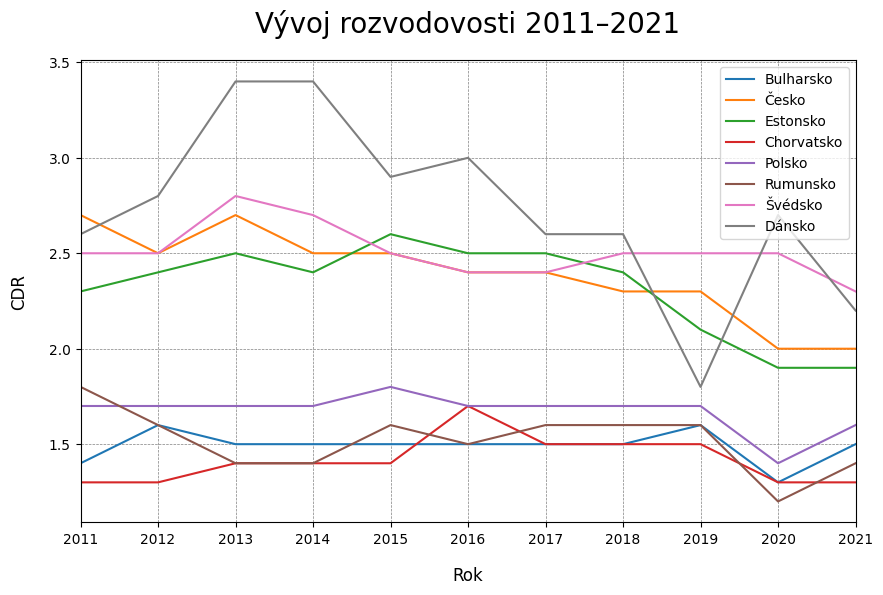

In [426]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
plt.style.use('default')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.margins(x=0)

#plt.figure(facecolor='white')

ax.plot(x_axis, div_bulharsko, color='C0', label="Bulharsko")
ax.plot(x_axis, div_cesko, color='C1', label="Česko")
ax.plot(x_axis, div_estonsko, color='C2', label="Estonsko")
ax.plot(x_axis, div_chorvatsko, color='C3', label="Chorvatsko")
ax.plot(x_axis, div_polsko, color='C4', label="Polsko")
ax.plot(x_axis, div_rumunsko, color='C5', label="Rumunsko")
ax.plot(x_axis, div_svedsko, color='C6', label="Švédsko")
ax.plot(x_axis, div_dansko, color='C7', label="Dánsko")
ax.plot()

ax.set_title("Vývoj rozvodovosti 2011–2021", fontsize=20, pad=20)
ax.set_xlabel("Rok", labelpad=15, fontsize=12)
ax.set_ylabel("CDR", labelpad=15, fontsize=12)

plt.legend(["Bulharsko", "Česko", "Estonsko", "Chorvatsko", "Polsko", "Rumunsko", "Švédsko", "Dánsko"], loc='upper right')

#mplcyberpunk.make_lines_glow()
plt.show()

In [427]:
mar_bulharsko = get_data(marriage_dataset, 'BG')
mar_cesko = get_data(marriage_dataset, 'CZ')
mar_estonsko = get_data(marriage_dataset, 'EE')
mar_spanelsko = get_data(marriage_dataset, 'ES')
mar_chorvatsko = get_data(marriage_dataset, 'HR')
mar_nizozemsko = get_data(marriage_dataset, 'NL')
mar_polsko = get_data(marriage_dataset, 'PL')
mar_rumunsko = get_data(marriage_dataset, 'RO')
mar_svedsko = get_data(marriage_dataset, 'SE')
mar_dansko = get_data(marriage_dataset, 'DK')

<Figure size 640x480 with 0 Axes>

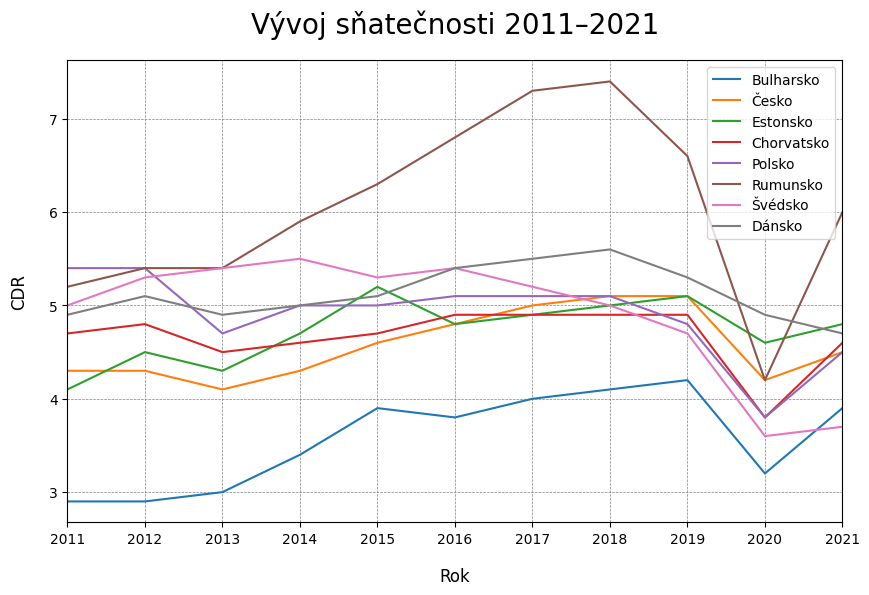

In [428]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
plt.style.use('default')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.margins(x=0)


ax.plot(x_axis, mar_bulharsko, color='C0', label="Bulharsko")
ax.plot(x_axis, mar_cesko, color='C1', label="Česko")
ax.plot(x_axis, mar_estonsko, color='C2', label="Estonsko")
ax.plot(x_axis, mar_chorvatsko, color='C3', label="Chorvatsko")
ax.plot(x_axis, mar_polsko, color='C4', label="Polsko")
ax.plot(x_axis, mar_rumunsko, color='C5', label="Rumunsko")
ax.plot(x_axis, mar_svedsko, color='C6', label="Švédsko")
ax.plot(x_axis, mar_dansko, color='C7', label="Dánsko")
ax.plot()

ax.set_title("Vývoj sňatečnosti 2011–2021", fontsize=20, pad=20)
ax.set_xlabel("Rok", labelpad=15, fontsize=12)
ax.set_ylabel("CDR", labelpad=15, fontsize=12)

plt.legend(["Bulharsko", "Česko", "Estonsko", "Chorvatsko", "Polsko", "Rumunsko", "Švédsko", "Dánsko"], loc='upper right')

plt.show()

In [433]:
df = pd.read_excel('tempo_rustu.xlsx', index_col=0)
# Multiply the last row by 100 and append the '%' symbol
df.iloc[-1] = df.iloc[-1].apply(lambda x: str(x * 100) + '%')
df

/var/folders/55/sj363chd34qbqsnzfdcm259c0000gn/T/ipykernel_2366/866522043.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.32%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[-1] = df.iloc[-1].apply(lambda x: str(x * 100) + '%')
/var/folders/55/sj363chd34qbqsnzfdcm259c0000gn/T/ipykernel_2366/866522043.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.76%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[-1] = df.iloc[-1].apply(lambda x: str(x * 100) + '%')
/var/folders/55/sj363chd34qbqsnzfdcm259c0000gn/T/ipykernel_2366/866522043.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.72%' has dtype incompatible with float64, please

,Česko,Švédsko,Estonsko,Dánsko,Rumunsko,Chorvatsko,Polsko
2011,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2012,0.931,1.0,1.043,1.077,0.889,1.0,1.0
2013,0.926,1.12,1.042,1.214,0.875,1.077,1.0
2014,1.08,0.964,0.96,1.0,1.0,1.0,1.0
2015,0.926,0.926,1.083,0.853,1.143,1.0,1.059
2016,1.0,0.96,0.962,1.034,0.938,1.214,0.944
2017,0.96,1.0,1.0,0.867,1.067,0.882,1.0
2018,1.0,1.042,0.96,1.0,1.0,1.0,1.0
2019,0.958,1.0,0.875,0.692,1.0,1.0,1.0
2020,1.0,1.0,0.905,1.5,0.75,0.867,0.824


In [438]:
df_2015 = pd.read_excel('2015.xlsx', index_col=0)
df_2015

,Česko,Dánsko,Estonsko,Řecko,Chorvatsko,Rumunsko,Švédsko,Polsko
2015,,,,,,,,
CDR,2.50,2.90,2.6,1.40,1.40,1.60,2.50,1.80
CMR,4.60,5.10,5.2,5.00,4.70,6.30,5.30,5.00
Index CDR/CDM,1.84,1.76,2.0,3.57,3.36,3.94,2.12,2.78


In [439]:
df_plot = df.iloc[:-1, :]
df_plot

,Česko,Švédsko,Estonsko,Dánsko,Rumunsko,Chorvatsko,Polsko
2011,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2012,0.931,1.0,1.043,1.077,0.889,1.0,1.0
2013,0.926,1.12,1.042,1.214,0.875,1.077,1.0
2014,1.08,0.964,0.96,1.0,1.0,1.0,1.0
2015,0.926,0.926,1.083,0.853,1.143,1.0,1.059
2016,1.0,0.96,0.962,1.034,0.938,1.214,0.944
2017,0.96,1.0,1.0,0.867,1.067,0.882,1.0
2018,1.0,1.042,0.96,1.0,1.0,1.0,1.0
2019,0.958,1.0,0.875,0.692,1.0,1.0,1.0
2020,1.0,1.0,0.905,1.5,0.75,0.867,0.824


In [445]:
index_cesko = df_plot.loc[:, 'Česko']
index_svedsko = df_plot.loc[:, 'Švédsko']
index_estonsko = df_plot.loc[:, 'Estonsko']
index_rumunsko = df_plot.loc[:, 'Rumunsko']
index_dansko = df_plot.loc[:, 'Dánsko']
index_chorvatsko = df_plot.loc[:, 'Chorvatsko']
index_polsko = df_plot.loc[:, 'Polsko']

<Figure size 640x480 with 0 Axes>

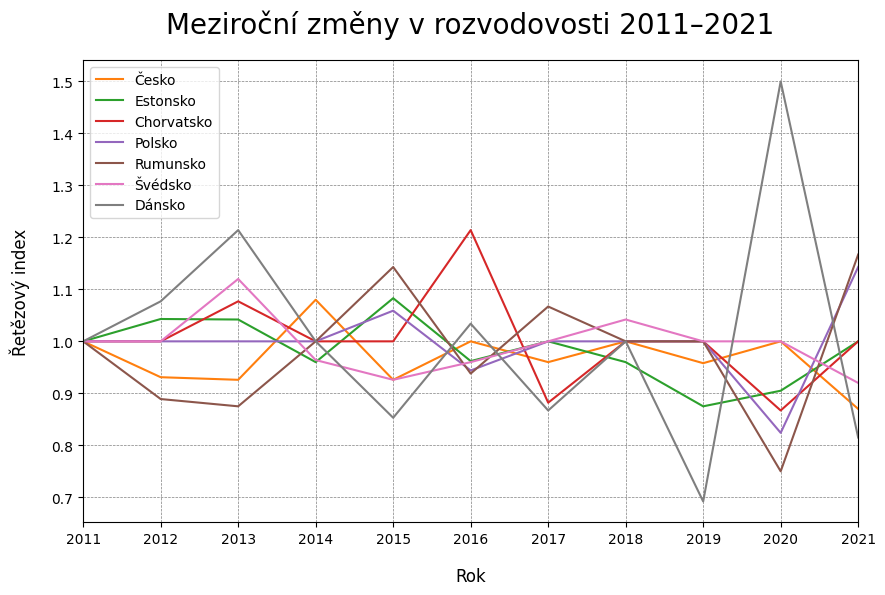

In [448]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
plt.style.use('default')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.margins(x=0)


ax.plot(x_axis, index_cesko, color='C1', label="Česko")
ax.plot(x_axis, index_estonsko, color='C2', label="Estonsko")
ax.plot(x_axis, index_chorvatsko, color='C3', label="Chorvatsko")
ax.plot(x_axis, index_polsko, color='C4', label="Polsko")
ax.plot(x_axis, index_rumunsko, color='C5', label="Rumunsko")
ax.plot(x_axis, index_svedsko, color='C6', label="Švédsko")
ax.plot(x_axis, index_dansko, color='C7', label="Dánsko")
ax.plot()

ax.set_title("Meziroční změny v rozvodovosti 2011–2021", fontsize=20, pad=20)
ax.set_xlabel("Rok", labelpad=15, fontsize=12)
ax.set_ylabel("Řetězový index", labelpad=15, fontsize=12)

plt.legend(["Česko", "Estonsko", "Chorvatsko", "Polsko", "Rumunsko", "Švédsko", "Dánsko"], loc='upper left')

plt.show()